In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data=load_iris()
import seaborn as sns

In [100]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [104]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [116]:
df = df[df['target'] != 0][['sepal width (cm)', 'petal width (cm)', 'target']]

In [117]:
df.head()

,sepal width (cm),petal width (cm),target
50,3.2,1.4,1
51,3.2,1.5,1
52,3.1,1.5,1
53,2.3,1.3,1
54,2.8,1.5,1


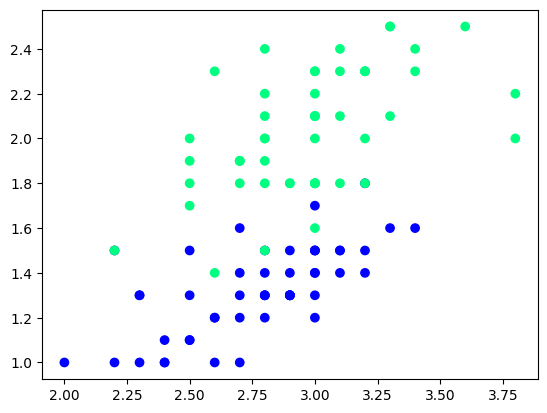

In [120]:
plt.scatter(df['sepal width (cm)'],df['petal width (cm)'],c=df['target'],cmap='winter')

In [123]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [124]:
df_train

,sepal width (cm),petal width (cm),target
90,2.6,1.2,1
148,3.4,2.3,2
146,2.5,1.9,2
67,2.7,1.0,1
149,3.0,1.8,2
96,2.9,1.3,1
132,2.8,2.2,2
73,2.8,1.2,1
140,3.1,2.4,2
127,3.0,1.8,2


In [125]:
df_val

,sepal width (cm),petal width (cm),target
74,2.9,1.3,1
120,3.2,2.3,2
69,2.5,1.1,1
80,2.4,1.1,1
141,3.1,2.3,2


In [126]:
df_test

,sepal width (cm),petal width (cm),target
50,3.2,1.4,1
99,2.8,1.3,1
107,2.9,1.8,2
66,3.0,1.5,1
111,2.7,1.9,2


In [127]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [128]:
y_test

array([1, 2, 1, 1, 2])

#CASE 1 BAGGING

In [134]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag


,sepal width (cm),petal width (cm),target
148,3.4,2.3,2
96,2.9,1.3,1
140,3.1,2.4,2
149,3.0,1.8,2
127,3.0,1.8,2
127,3.0,1.8,2
67,2.7,1.0,1
140,3.1,2.4,2


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [132]:
dt_bag1 = DecisionTreeClassifier()

In [142]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

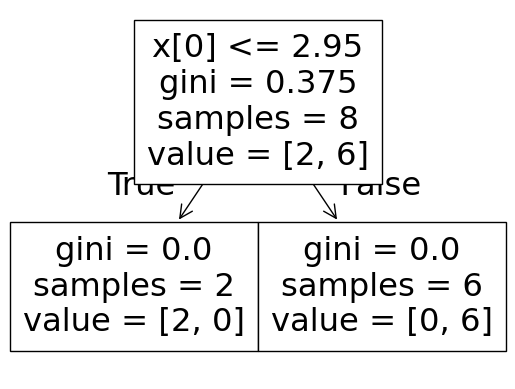

1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


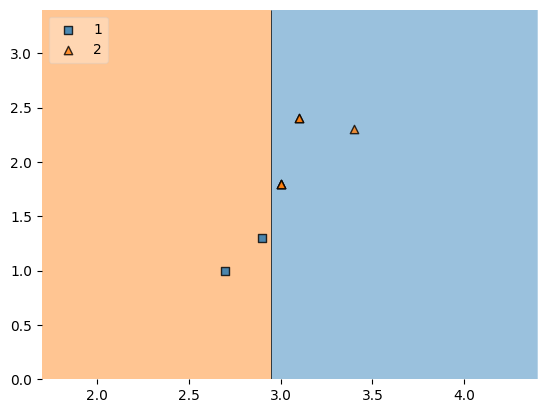

In [143]:
evaluate(dt_bag1,X,y)

In [138]:
# Data for Tree 2
df_bag2 = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal width (cm),target
148,3.4,2.3,2
96,2.9,1.3,1
140,3.1,2.4,2
149,3.0,1.8,2
127,3.0,1.8,2
127,3.0,1.8,2
67,2.7,1.0,1
140,3.1,2.4,2


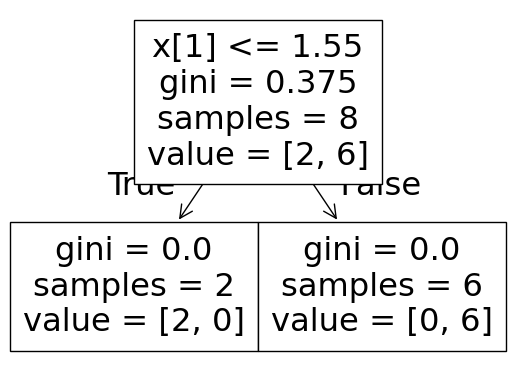

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


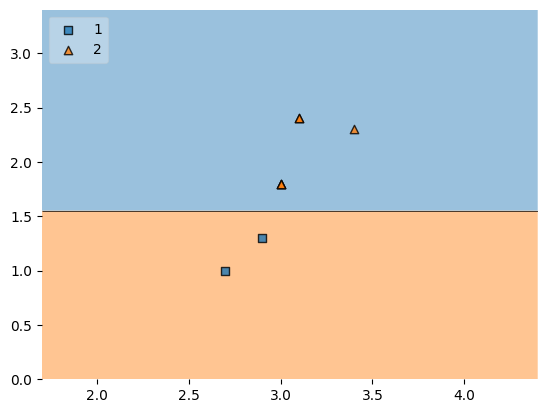

In [139]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [144]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal width (cm),target
146,2.5,1.9,2
132,2.8,2.2,2
148,3.4,2.3,2
132,2.8,2.2,2
127,3.0,1.8,2
67,2.7,1.0,1
149,3.0,1.8,2
96,2.9,1.3,1


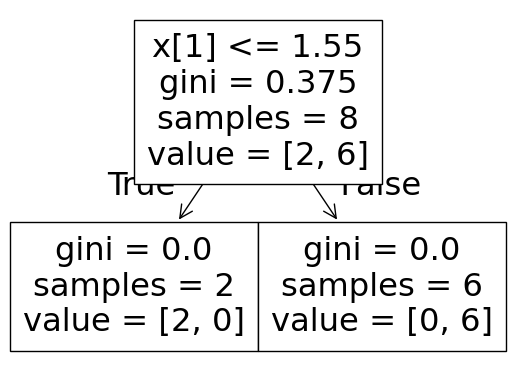

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


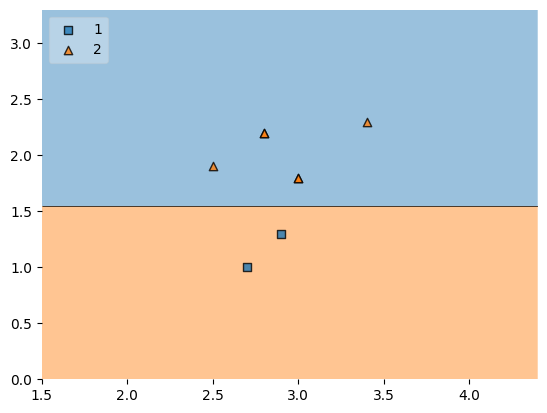

In [145]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Aggregation or prediction

In [146]:
df_test

,sepal width (cm),petal width (cm),target
50,3.2,1.4,1
99,2.8,1.3,1
107,2.9,1.8,2
66,3.0,1.5,1
111,2.7,1.9,2


In [147]:
print("Predictor 1",dt_bag1.predict(np.array([3.2,1.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.2,1.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.2,1.4]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
